For OMUSE, Grids are probably the most important data model for simulation data. AMUSE provides two general data models: *particle sets* and *grid*. Particle sets are collections of points with attributes, where points (and sets) can be added and removed. Grids are inmutable in the number of grid points in any direction. You cannot add a gridpoint like you add a particle in a particle set, instead you define the number of points in each direction on creation of the grid and amuse will create the grid points.

In [8]:
%matplotlib inline
from omuse.units import units, constants
from amuse.datamodel import Grid

Let's start by creating a simple 3 by 4 grid.

In [2]:
grid = Grid(3,4)
print grid

RegularGrid (3 x 4) ()


Different types are are available: `CartesianGrid`, `RegularGrid`, `RectilinearGrid`, `StructuredGrid`, `UnstructuredGrid`. These are generated most easily by using the corresponding factory functions:

In [9]:
from amuse.datamodel import new_regular_grid

In [7]:
grid = new_regular_grid((10,10), (1.| units.m, 2.| units.m))
print grid
print grid.x

RegularGrid (10 x 10) (x, y)
[[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15], [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25], [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35], [0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45], [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55], [0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65], [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75], [0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85], [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]] m


The returned positions are the centers of the gridpoints, we can make a small plot to show where the grid centers are positioned.

(0, 2)

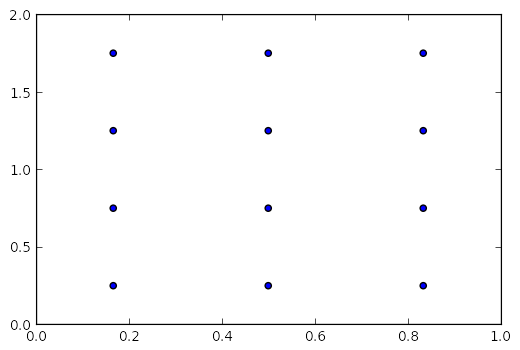

In [11]:
from matplotlib import pyplot
grid = new_regular_grid((3,4),(1|units.m, 2|units.m))
pyplot.scatter(
    grid.x.value_in(units.m),
    grid.y.value_in(units.m)
)
pyplot.xlim(0,1)
pyplot.ylim(0,2)

You can index a grid in two ways, direct indexing on the grid or indexing on an attribute. Direct indexing on a grid can be more efficient as no data is retrieved until you actually requenst an attribute. If you first request an attribute and then do the indexing, all data for the attribute is retrieved and returned first as a vector quantity (or numpy array), next a subselection is made using the indexing routines. Both method should return the same quantities.

In [12]:
print grid.position[0][0]
print grid[0][0].position

[0.166666666667, 0.25] m
[0.166666666667, 0.25] m


In this case the attribute `position` is a predefined attribute on the grid, which returns the x,y position. Such an attribute can also be set to, e.g. move around a grid if needed:

In [13]:
grid.position -= [0.5,1.0] | units.m